In [9]:
import os 

# modules for visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# sns.set(style="ticks", context="talk")
# plt.style.use("dark_background")

# modules for data processing
import numpy as np
from scipy import signal
from scipy.io import wavfile
import wave
import struct

# modules for data mining
import sklearn

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [22]:
# Get data files

two_up =  os.path.abspath(os.path.join('.' ,"../.."))
print("Project root path is: ", two_up)


dataDirName = "data"
rawDataDirName = "test_data"
# className = "violin"
# className = "guitar"
className = "noisy_sine"
data_path = os.path.join(two_up, dataDirName, rawDataDirName, className)

print(data_path)
root_paths = []

# Get all files from data_path 
# r=root, d=directories, f = files
(_, d, allFiles) = next(os.walk(data_path))
wavFiles = [f for f in allFiles if f.endswith(".wav")]


Project root path is:  D:\Programming\AudioMining
D:\Programming\AudioMining\data\test_data\noisy_sine


#### Load file and listen

In [23]:
file = wavFiles[0]
x, fs = librosa.load(os.path.join(data_path, file), sr=None)
IPython.display.Audio(x, rate=fs)

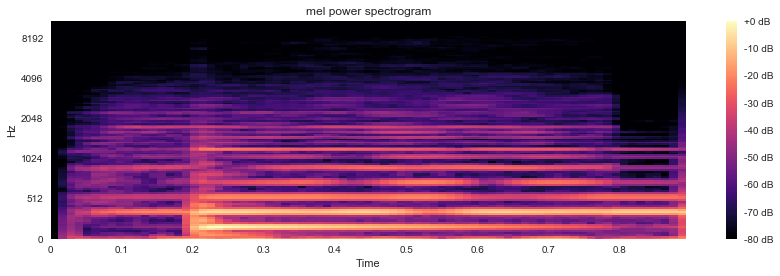

In [24]:
S = librosa.feature.melspectrogram(x, sr=fs, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=fs, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [25]:
X = librosa.feature.mfcc(x, sr=fs)
print(X.shape)

(20, 77)


In [26]:
X = sklearn.preprocessing.scale(X)
X.mean()

c:\users\marius\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\marius\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


1.0837208e-09

In [27]:
model = sklearn.decomposition.PCA(n_components=2, whiten=True)
model.fit(X.T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [28]:
Y = model.transform(X.T)
print(Y.shape)

(77, 2)


In [29]:
model.components_.shape

(2, 20)

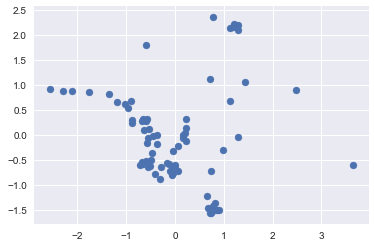

In [30]:
plt.scatter(Y[:,0], Y[:,1])